# **Pendahuluan: Kasus COVID-19 Seluruh Provinsi**

In [ ]:
import requests
import numpy as np
import pandas as pd
from datetime import datetime

resp_all_prov = requests.get('https://data.covid19.go.id/public/api/prov.json', verify=False)
print("Status Keberhasilan", resp_all_prov)
print("")
print("Status Headers", resp_all_prov.headers)
print("")
all_province = resp_all_prov.json()

print('Length of cov_id_raw : %d.' %len(all_province))
print('Komponen cov_id_raw  : %s.' %all_province.keys())

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Status Keberhasilan <Response [200]>

Status Headers {'Server': 'nginx', 'Date': 'Thu, 20 Oct 2022 01:02:01 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Thu, 20 Oct 2022 01:00:57 GMT', 'ETag': 'W/"63509dc9-680a"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}

Length of cov_id_raw : 5.
Komponen cov_id_raw  : dict_keys(['last_date', 'current_data', 'missing_data', 'tanpa_provinsi', 'list_data']).


In [ ]:
prov_df = pd.DataFrame(all_province['list_data'])
print('prov_df:\n', prov_df.info())
print('\nprov_df:\n', prov_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               34 non-null     object 
 1   doc_count         34 non-null     float64
 2   jumlah_kasus      34 non-null     int64  
 3   jumlah_sembuh     34 non-null     int64  
 4   jumlah_meninggal  34 non-null     int64  
 5   jumlah_dirawat    34 non-null     int64  
 6   jenis_kelamin     34 non-null     object 
 7   kelompok_umur     34 non-null     object 
 8   lokasi            34 non-null     object 
 9   penambahan        34 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.8+ KB
prov_df:
 None

prov_df:
            key  doc_count  jumlah_kasus  jumlah_sembuh  jumlah_meninggal  \
0  DKI JAKARTA  22.174724       1425915        1401186             15559   
1   JAWA BARAT  18.345623       1179690        1157286             15962   
2  JAWA TENGAH   

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 <a list of 34 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

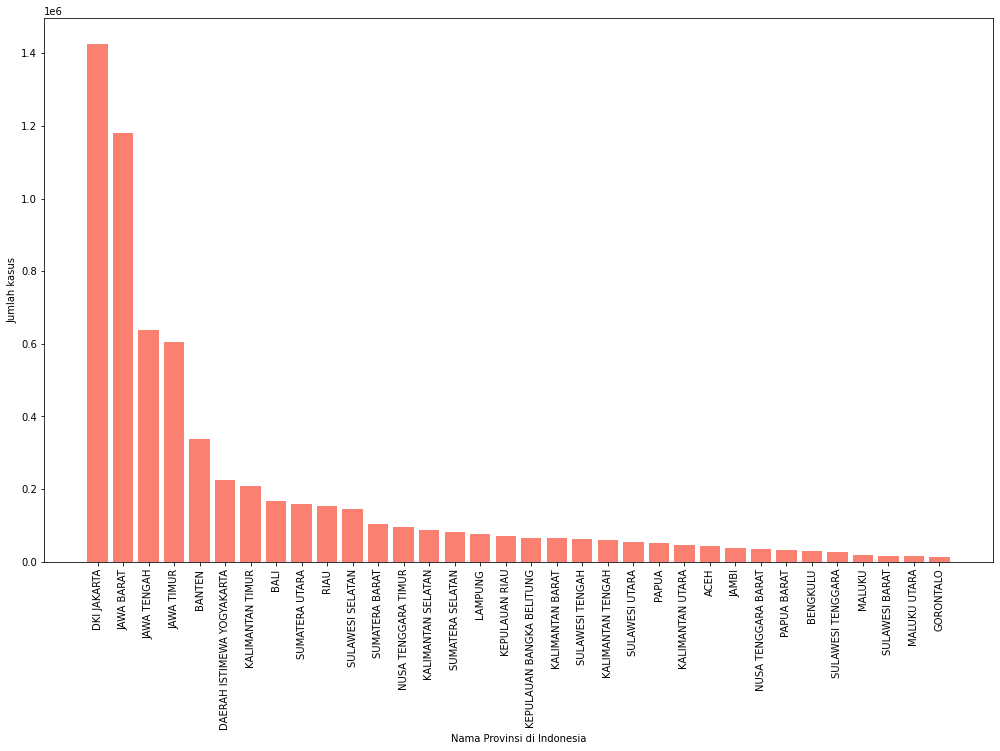

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(17,10))
ax.bar(data=prov_df, x='key', height='jumlah_kasus', color='salmon')
ax.set_xlabel('Nama Provinsi di Indonesia')
ax.set_ylabel('Jumlah kasus')
plt.xticks(rotation=90)

Pada Bar Plot dia atas dapat diketahui bahwa provinsi dengan kasus COVID 19 tertinggi adalah provinsi DKI Jakarta.

# **Kasus COVID 19 di DKI Jakarta**

In [ ]:
import requests
import numpy as np
import pandas as pd
from datetime import datetime

resp = requests.get('https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json', verify=False)
print("Status Keberhasilan", resp)
print("")
print("Status Headers", resp.headers)
print("")
cov_dki_jakarta = resp.json()

print('Length of cov_id_raw : %d.' %len(cov_dki_jakarta))
print('Komponen cov_id_raw  : %s.' %cov_dki_jakarta.keys())

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Status Keberhasilan <Response [200]>

Status Headers {'Server': 'nginx', 'Date': 'Thu, 20 Oct 2022 01:02:38 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Thu, 20 Oct 2022 01:00:53 GMT', 'ETag': 'W/"63509dc5-3541d"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}

Length of cov_id_raw : 13.
Komponen cov_id_raw  : dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data']).


In [ ]:
print('\nJumlah total kasus COVID-19 di DKI Jakarta : %d'
     %cov_dki_jakarta['kasus_total'])
print('Persentase kematian akibat COVID-19 di DKI Jakarta : %f%%'
     %cov_dki_jakarta['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta : %f%%' %cov_dki_jakarta['sembuh_persen'])


Jumlah total kasus COVID-19 di DKI Jakarta : 1425915
Persentase kematian akibat COVID-19 di DKI Jakarta : 1.091159%
Persentase tingkat kesembuhan dari COVID-19 di DKI Jakarta : 98.265745%


In [ ]:
dki_jakarta_df = pd.DataFrame(cov_dki_jakarta['list_perkembangan'])
print('dki_jakarta_df:\n', dki_jakarta_df.info())
print('\ndki_jakarta_df:\n', dki_jakarta_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       944 non-null    int64
 1   KASUS                         944 non-null    int64
 2   MENINGGAL                     944 non-null    int64
 3   SEMBUH                        944 non-null    int64
 4   DIRAWAT_OR_ISOLASI            944 non-null    int64
 5   AKUMULASI_KASUS               944 non-null    int64
 6   AKUMULASI_SEMBUH              944 non-null    int64
 7   AKUMULASI_MENINGGAL           944 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  944 non-null    int64
dtypes: int64(9)
memory usage: 66.5 KB
dki_jakarta_df:
 None

dki_jakarta_df:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583020800000      2          0       0                   2   
1  1583107200000      2          0       0                

In [ ]:
dki_jakarta_tidy = (dki_jakarta_df.drop(columns=[item for item in dki_jakarta_df.columns
                                               if item.startswith('AKUMULASI')
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
dki_jakarta_tidy['tanggal'] = pd.to_datetime(dki_jakarta_tidy['tanggal']*1e6, unit='ns')
print(dki_jakarta_tidy)

In [ ]:
print('Lima data teratas:\n', dki_jakarta_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-01           2          0       0
1 2020-03-02           2          0       0
2 2020-03-03           2          0       0
3 2020-03-04           2          0       0
4 2020-03-05           0          1       0


# **Grafik kasus positif COVID 19**

Bar chart berikut ini menunjukkan kondisi kasus harian postif COVID19 di DKI Jakarta hingga September 2022 (sebelum Oktober 2022).

<Figure size 432x288 with 0 Axes>

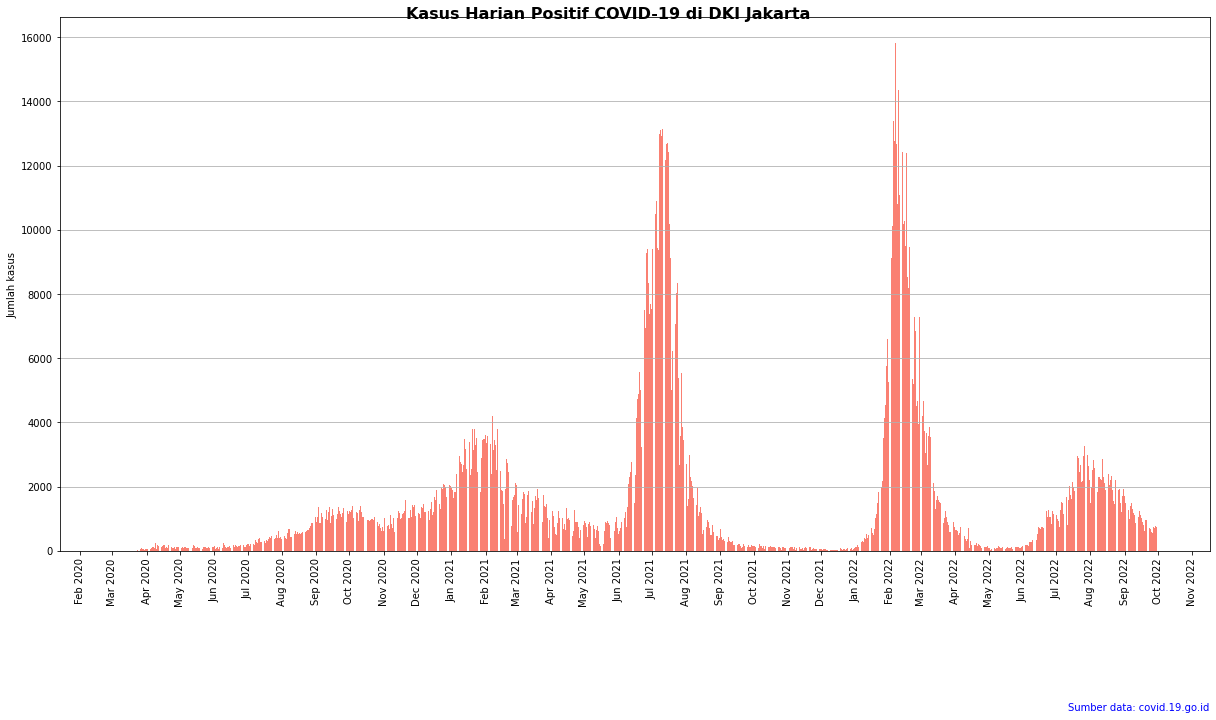

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(17,10))
ax.bar(data=dki_jakarta_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di DKI Jakarta',
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Kasus harian tertinggi yang positif COVID 19 di DKI Jakarta terjadi pada bulan Februari 2022.

# **Grafik untuk Kasus Sembuh**

<Figure size 432x288 with 0 Axes>

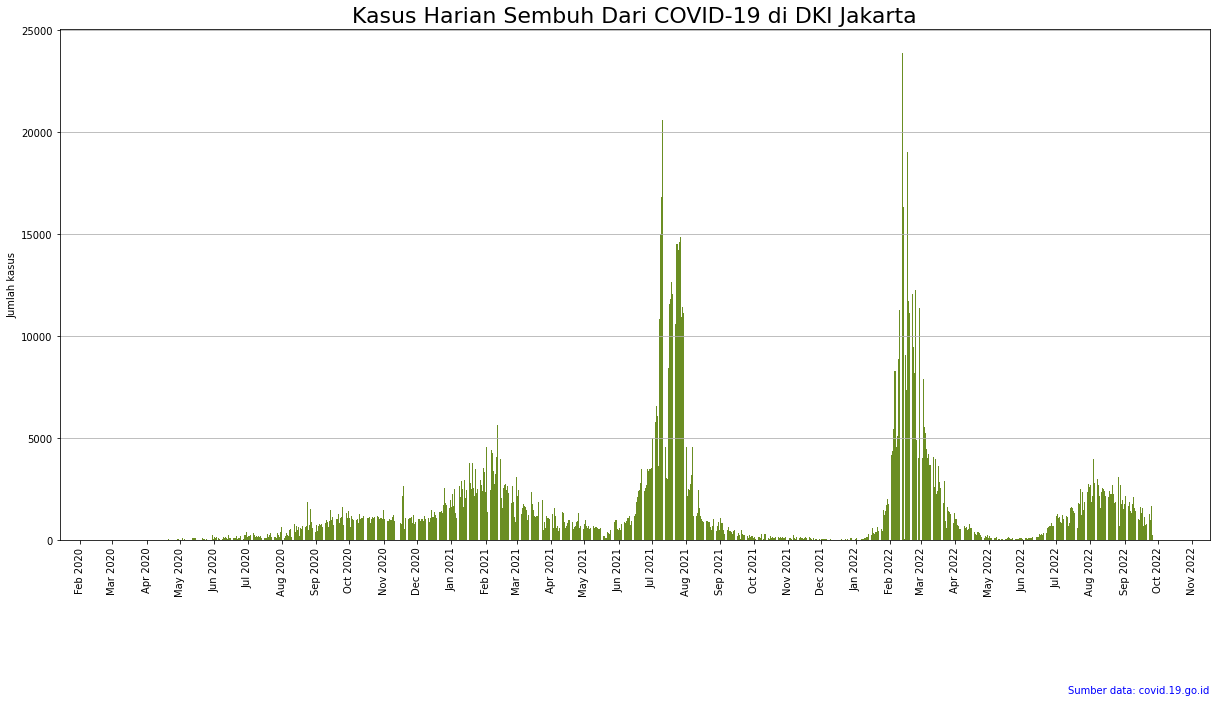

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(17,10))
ax.bar(data=dki_jakarta_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di DKI Jakarta',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Kasus harian tertinggi yang sembuh COVID 19 di DKI Jakarta juga terjadi pada bulan Februari 2022.

# **Grafik untuk Kasus Meninggal**

<Figure size 432x288 with 0 Axes>

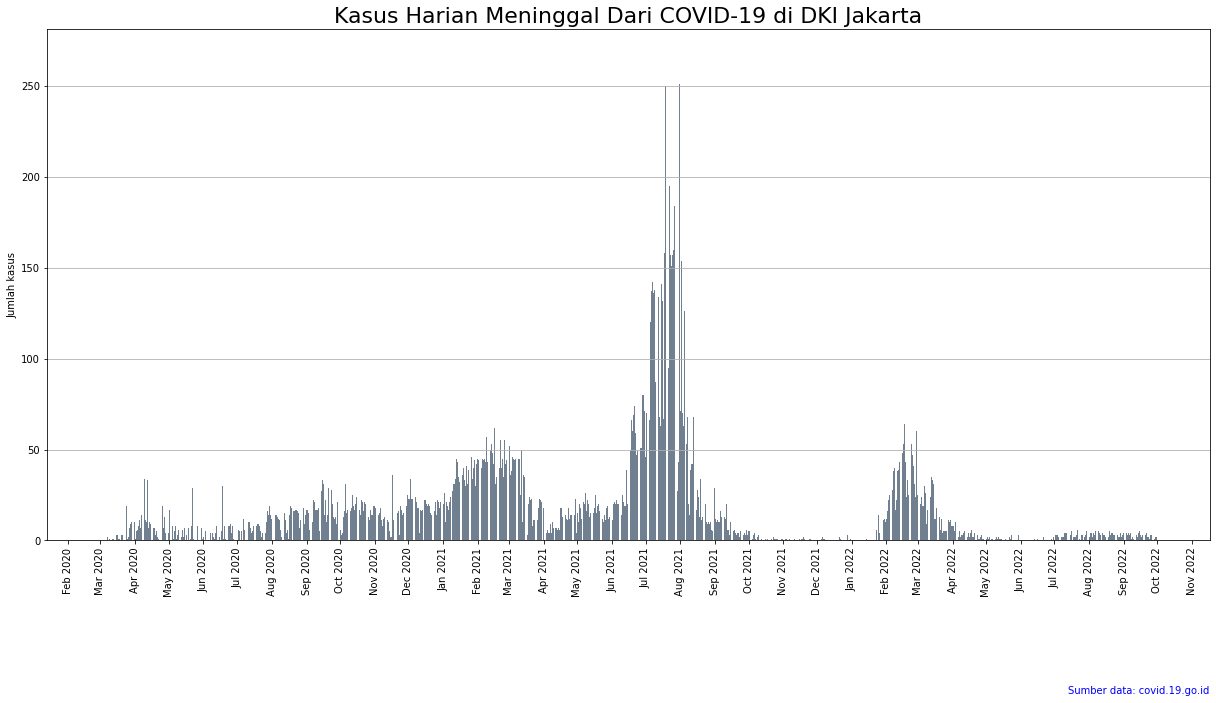

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(17,10))
ax.bar(data=dki_jakarta_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di DKI Jakarta',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

*   Kasus harian tertinggi yang meninggal dari COVID 19 di DKI Jakarta terjadi pada bulan Juli-Agustus 2021.
*   Pada bulan September 2021-Januari 2022, terjadi penurunan yang signifikan kasus harian meninggal COVID 19 di DKI Jakarta.
*   Namun, kembali meningkat kasus harian yang meninggal COVID 19 sekitar akhir bulan Januari 2022 sampai Maret 2022.
*   dan kembali menurun kasusnya sekitar bulan April-Juni 2022
*   Kemudian mengalami peningkatan kembali pada bulan Juli-Oktober 2022. Peningkatan yang terjadi ini tidak terlalu signifikan, karena jumlah kasus harian meninggal dari COVID 19 di DKI Jakarta pada bulan tersebut relatif rendah.





  

**Selanjutnya, bagaimana perkembangan kasus COVID 19 dalam rentang waktu pekanan?**

In [ ]:
dki_jakarta_pekanan = (dki_jakarta_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
dki_jakarta_pekanan['tahun'] = dki_jakarta_pekanan['tanggal'].apply(lambda x: x.year)
dki_jakarta_pekanan['pekan_ke'] =dki_jakarta_pekanan['tanggal'].apply(lambda x: x.weekofyear)
dki_jakarta_pekanan = dki_jakarta_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info dki_jakarta_pekanan:')
print(dki_jakarta_pekanan.info())
print('\nLima data teratas dki_jakarta_pekanan:\n', dki_jakarta_pekanan.head())

Info dki_jakarta_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     136 non-null    int64
 1   pekan_ke  136 non-null    int64
 2   jumlah    136 non-null    int64
dtypes: int64(3)
memory usage: 3.3 KB
None

Lima data teratas dki_jakarta_pekanan:
    tahun  pekan_ke  jumlah
0   2020         9       2
1   2020        10       6
2   2020        11      16
3   2020        12      22
4   2020        13     248


Apakah pekan ini lebih baik dari pekan kemarin?

Hasil komparasi ini disimpan dalam kolom baru dengan nama 'lebih_baik', isinya adalah **True** apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu

In [ ]:
dki_jakarta_pekanan['jumlah_pekanlalu'] = dki_jakarta_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
dki_jakarta_pekanan['lebih_baik'] = dki_jakarta_pekanan['jumlah'] < dki_jakarta_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', dki_jakarta_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020         9       2                 0       False
1   2020        10       6                 2       False
2   2020        11      16                 6       False
3   2020        12      22                16       False
4   2020        13     248                22       False
5   2020        14     421               248       False
6   2020        15     933               421       False
7   2020        16     958               933       False
8   2020        17     749               958        True
9   2020        18     762               749       False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
print(dki_jakarta_pekanan.tail(47))

     tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
89    2021        45     541               707        True
90    2021        46     667               541       False
91    2021        47     406               667        True
92    2021        48     316               406        True
93    2021        49     212               316        True
94    2021        50     254               212       False
95    2021        51     348               254       False
96    2022        52     526               348       False
97    2022         1    1784               526       False
98    2022         2    3627              1784       False
99    2022         3    8378              3627       False
100   2022         4   28777              8378       False
101   2022         5   72896             28777       False
102   2022         6   82237             72896       False
103   2022         7   66460             82237        True
104   2022         8   37872             66460        Tr

**Bar chart kasus positif COVID 19 DKI Jakarta dalam Pekanan.**

<Figure size 432x288 with 0 Axes>

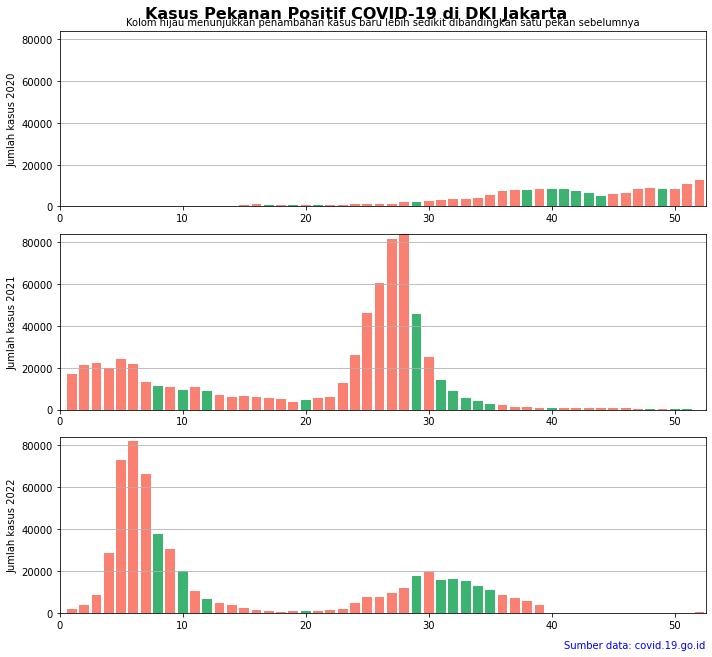

In [ ]:
import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19=dki_jakarta_pekanan['tahun'].nunique()
tahun_terjadi_covid19=dki_jakarta_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
						figsize=(10, 3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di DKI Jakarta',
			y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
	ax.bar(data=dki_jakarta_pekanan.loc[dki_jakarta_pekanan['tahun']==tahun_terjadi_covid19[i]],
		x='pekan_ke', height='jumlah',
		color=['mediumseagreen' if x is True else 'salmon'
			   for x in dki_jakarta_pekanan['lebih_baik']])
	if i==0:
		ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
					 fontsize=10)
	elif i==jml_tahun_terjadi_covid19-1:
		ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
			ha='right', transform=ax.transAxes)

	ax.set_xlim([0, 52.5])
	ax.set_ylim([0, max(dki_jakarta_pekanan['jumlah'])])
	ax.set_xlabel('')
	ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
	ax.grid(axis='y')

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bahwa pada pekan ke-31 sampai pekan ke-35 tahun 2022, penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya. Meskipun pada pekan berikutnya menunjukkan penambahan kasus baru lebih banyak dibandingkan satu pekan sebelumnya.

Selanjutnya, ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat.
Hal ini dapat memunculkan pertanyaan : "Hingga saat ini ada berapa kasus yang masih **aktif**?"

**Aktif dalam artian** sedang dalam perawatan atau isolasi. Jumlah kasus aktif dapat dihitung dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal.

In [ ]:
cov_dki_akumulasi = dki_jakarta_tidy[['tanggal']].copy()
cov_dki_akumulasi['akumulasi_aktif'] = (dki_jakarta_tidy['kasus_baru'] - dki_jakarta_tidy['sembuh'] - dki_jakarta_tidy['meninggal']).cumsum()
cov_dki_akumulasi['akumulasi_sembuh'] = dki_jakarta_tidy['sembuh'].cumsum()
cov_dki_akumulasi['akumulasi_meninggal'] = dki_jakarta_tidy['meninggal'].cumsum()
print(cov_dki_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
939 2022-09-26             6364           1401031                15533
940 2022-09-27             7089           1401046                15533
941 2022-09-28             7768           1401061                15534
942 2022-09-29             8508           1401100                15536
943 2022-09-30             9217           1401123                15538


Kemudian, berikut ini line-chart pola kasus aktif COVID 19 di DKI Jakarta.

<Figure size 432x288 with 0 Axes>

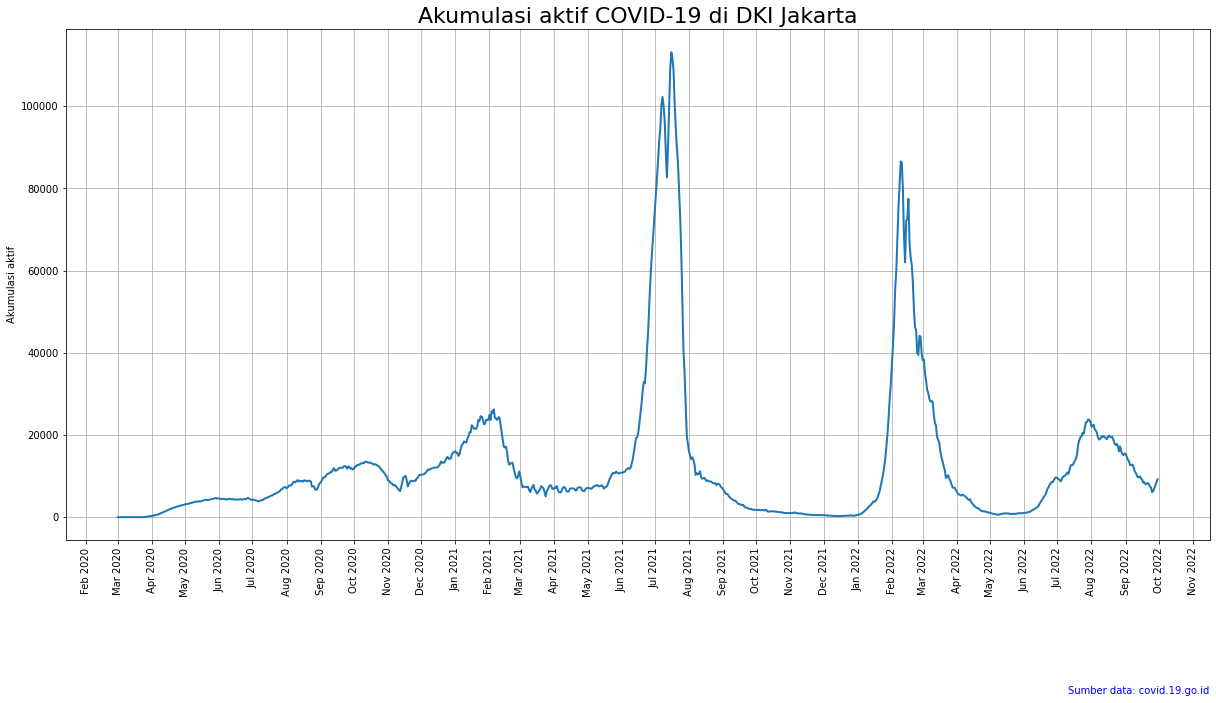

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(17,10))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_dki_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di DKI Jakarta',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

Berdasarkan grafik 'line-chart' di atas dapat diketahui bahwa:

*   Akumulasi aktif COVID 19 tertinggi di DKI Jakarta terjadi pada sekitar pertengahan bulan Juli 2021. Kemudian mengalami penurunan hingga akhir Desember 2021.
*   Pada bulan Januari-Februari 2022 mulai terjadi peningkatan kembali. Kemudian mengalami penurunan hingga akhir Mei 2022, dan mengalami peningkatan kembali pada awal bulan Juni 2022 hingga akhir bulan Juli 2022.
*   Sekitar bulan Agustus-September 2022 terjadi penurunan kembali akumulasi aktif COVID 19 di DKI Jakarta. Meskipun pada sekitar akhir bulan September mulai meningkat kembali. Namun peningkatan ini tidak terlalu signifikan (peningkatan kasus aktif relatif rendah).

# **Grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal**

<Figure size 432x288 with 0 Axes>

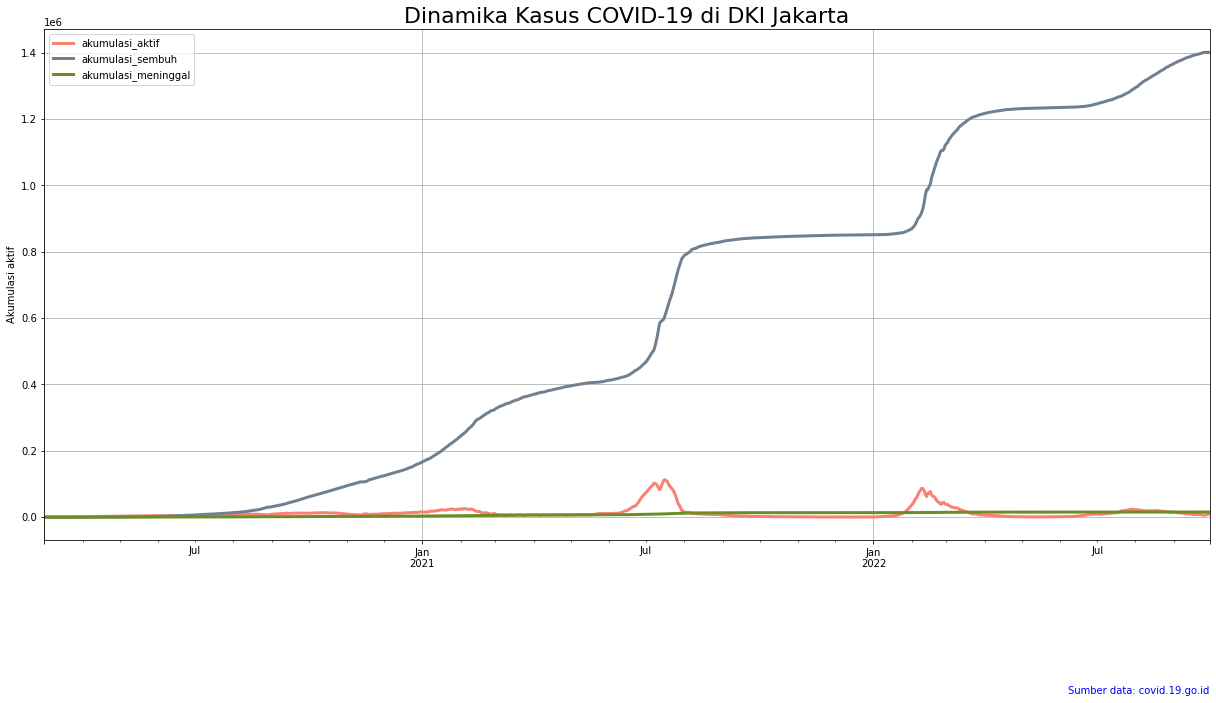

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig, ax = plt.subplots(figsize=(17,10))
cov_dki_akumulasi_ts=cov_dki_akumulasi.set_index('tanggal')
cov_dki_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
       color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di DKI Jakarta',
			 fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan bahwa:

*   Dari awal kemunculan COVID 19 di DKI Jakarta hingga saat ini, akumulasi sembuh kasus COVID 19 di DKI Jakarta cenderung meningkat.
*   Bahkan akumulasi kasus yang meninggal maupun yang aktif rata-rata kurang dari 200000 kasus atau sekitar kurang dari 14.02% (dari total kasus COVID 19 di DKI Jakarta yaitu 1425915 kasus).
*   Hal ini berarti bahwa tingkat kesembuhan COVID 19 di DKI Jakarta lebih tinggi dibandingkan kasus yang meninggal ataupun yang aktif.







# **Kesimpulan**
Berdasarkan eksplorasi data COVID 19 di DKI Jakarta, dapat disimpulkan beberapa hal sebagai berikut:


*   DKI Jakarta merupakan provinsi dengan total kasus COVID 19 tertinggi di Indonesia, yaitu 1425915 kasus.
*   Kasus harian tertinggi yang positif COVID 19 di DKI Jakarta terjadi pada bulan Februari 2022.  
*   Kasus harian tertinggi yang sembuh COVID 19 di DKI Jakarta juga terjadi pada bulan Februari 2022.
*   Sedangkan Kasus harian tertinggi yang meninggal dari COVID 19 di DKI Jakarta terjadi pada bulan Juli-Agustus 2021.
*   Akumulasi aktif COVID 19 tertinggi di DKI Jakarta terjadi pada sekitar pertengahan bulan Juli 2021
*   Tingkat kesembuhan COVID 19 di DKI Jakarta lebih tinggi dibandingkan kasus yang meninggal ataupun yang aktif.



